Packages & settings

In [290]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import math


pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

Relevant directories

In [291]:
base_dir = Path(os.path.abspath(''))
data_dir =Path(os.path.abspath('c:\\Users\\erika\\Desktop\\Exjobb\\data'))

os.chdir(base_dir)

Data import

In [292]:
os.chdir(data_dir)
gen_data = pd.read_csv('gendata.tsv',sep='\t',header=0,low_memory=False)


Data structure 

In [293]:
print('Num samples:',gen_data.shape[0])
print('Num columns:',gen_data.shape[1])

gen_data.head()
#Jag har fler samples

Num samples: 353935
Num columns: 67


,#label,FDA_lab_id,HHS_region,IFSAC_category,LibraryLayout,PFGE_PrimaryEnzyme_pattern,PFGE_SecondaryEnzyme_pattern,Platform,Run,asm_acc,asm_level,asm_stats_contig_n50,asm_stats_length_bp,asm_stats_n_contig,assembly_method,attribute_package,bioproject_acc,bioproject_center,biosample_acc,isolate_identifiers,collected_by,collection_date,epi_type,fullasm_id,geo_loc_name,host,host_disease,isolation_source,lat_lon,ontological_term,outbreak,sample_name,scientific_name,serovar,source_type,species_taxid,sra_center,sra_release_date,strain,sequenced_by,project_name,food_origin,target_acc,target_creation_date,taxid,wgs_acc_prefix,wgs_master_acc,minsame,mindiff,computed_types,number_drugs_resistant,number_drugs_intermediate,number_drugs_susceptible,number_drugs_tested,number_amr_genes,number_core_amr_genes,AST_phenotypes,AMR_genotypes,AMR_genotypes_core,number_stress_genes,stress_genotypes,number_virulence_genes,virulence_genotypes,amrfinder_version,refgene_db_version,amrfinder_analysis_type,amrfinder_applied
0,PDT000002365.3|SAMN02368173|GCA_012802165.1|Es...,NaN,NaN,NaN,PAIRED,NaN,NaN,ILLUMINA,SRR1060511,GCA_012802165.1,Contig,134039,4718827,88,SKESA v. 2.2,Pathogen: clinical or host-associated,PRJNA203445,University of California at Davis,SAMN02368173,"BCW_2912,""CFSAN005754"",""ESC0165"",""SRS519863""",FDA,NaN,clinical,19221148.0,USA,Homo sapiens,NaN,human,NaN,NaN,NaN,BCW_2912,Escherichia coli,NaN,NaN,562,UCD-100K,2015-07-22,ESC0165,NaN,NaN,NaN,PDT000002365.3,2015-09-14,562,DABDQO,DABDQO000000000.1,NaN,NaN,NaN,0,0,0,0,3,0,NaN,"acrF,blaEC,mdtM",NaN,2,"ariR,emrE",3,"astA,espX1=PARTIAL,fdeC",3.11.26,2023-08-08.2,COMBINED,1
1,PDT000002366.3|SAMN02368174|GCA_012802195.1|Es...,NaN,NaN,NaN,PAIRED,NaN,NaN,ILLUMINA,SRR1060510,GCA_012802195.1,Contig,73843,4931067,157,SKESA v. 2.2,Pathogen: environmental/food/other,PRJNA203445,University of California at Davis,SAMN02368174,"BCW_2914,""CFSAN005756"",""ESC0167"",""SRS519864""",FDA,NaN,environmental/other,19221188.0,USA,NaN,NaN,dog,NaN,NaN,NaN,BCW_2914,Escherichia coli,NaN,NaN,562,UCD-100K,2015-07-22,ESC0167,NaN,NaN,NaN,PDT000002366.3,2015-09-14,562,DABDQN,DABDQN000000000.1,NaN,NaN,NaN,0,0,0,0,6,3,NaN,"aadA1,acrF,blaEC,mdtM,sul1,tet(A)","aadA1,sul1,tet(A)",9,"ariR,merA=HMM,merC,merD=HMM,merE=HMM,merP,merR...",1,espX1=PARTIAL,3.11.26,2023-08-08.2,COMBINED,1
2,PDT000002367.3|SAMN02368180|GCA_012802235.1|Es...,NaN,NaN,NaN,PAIRED,NaN,NaN,ILLUMINA,SRR1060509,GCA_012802235.1,Contig,81293,5045269,220,SKESA v. 2.2,Pathogen: clinical or host-associated,PRJNA203445,University of California at Davis,SAMN02368180,"BCW_2923,""CFSAN005765"",""ESC0176"",""SRS519865""",FDA,NaN,clinical,19221208.0,Sweden,Homo sapiens,NaN,human,NaN,NaN,NaN,BCW_2923,Escherichia coli,NaN,NaN,562,UCD-100K,2015-07-22,ESC0176,NaN,NaN,NaN,PDT000002367.3,2015-09-14,562,DABDQR,DABDQR000000000.1,NaN,NaN,NaN,0,0,0,0,3,0,NaN,"acrF,blaEC,mdtM",NaN,2,"ariR,emrE",5,"espX1=PARTIAL,fdeC,iha,mchB,mchF",3.11.26,2023-08-08.2,COMBINED,1
3,PDT000002368.3|SAMN02368181|GCA_012802275.1|Es...,NaN,NaN,NaN,PAIRED,NaN,NaN,ILLUMINA,SRR1060508,GCA_012802275.1,Contig,85880,4922402,145,SKESA v. 2.2,Pathogen: clinical or host-associated,PRJNA203445,University of California at Davis,SAMN02368181,"BCW_2925,""CFSAN005767"",""ESC0178"",""SRS519866""",FDA,NaN,clinical,19221248.0,Sweden,Homo sapiens,NaN,human,NaN,NaN,NaN,BCW_2925,Escherichia coli,NaN,NaN,562,UCD-100K,2015-07-22,ESC0178,NaN,NaN,NaN,PDT000002368.3,2015-09-14,562,DABDQQ,DABDQQ000000000.1,NaN,NaN,NaN,0,0,0,0,3,0,NaN,"acrF,blaEC,mdtM",NaN,26,"ariR,clpK,emrE,hdeD-GI,hsp20,kefB-GI,pcoA,pcoB...",2,"fdeC,sslE=HMM",3.11.26,2023-08-08.2,COMBINED,1
4,PDT000002369.3|SAMN02368184|GCA_012802315.1|Es...,NaN,NaN,NaN,PAIRED,NaN,NaN,ILLUMINA,SRR1060507,GCA_012802315.1,Contig,83886,4647912,126,SKESA v. 2.2,Pathogen: environmental/food/other,PRJNA203445,University of California at Davis,SAMN02368184,"BCW_2929,""CFSAN005771"",""ESC0182"",""SRS519867""",FDA,NaN,environmental/other,19221308.0,USA:WA,NaN,NaN,Celebese ape,NaN,NaN,

Selected data

In [294]:
data_selected = gen_data[['sample_name', 'isolation_source','geo_loc_name', 'number_core_amr_genes','collection_date', 'AMR_genotypes', 'AMR_genotypes_core', 'AST_phenotypes']]
data_selected['has both'] = data_selected['AMR_genotypes_core'].notnull() & data_selected['AST_phenotypes'].notnull()
data_selected['has neither'] = data_selected['AMR_genotypes_core'].isnull() & data_selected['AST_phenotypes'].isnull()


data_selected.head()

C:\Users\erika\AppData\Local\Temp\ipykernel_12648\3874242191.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_selected['has both'] = data_selected['AMR_genotypes_core'].notnull() & data_selected['AST_phenotypes'].notnull()
C:\Users\erika\AppData\Local\Temp\ipykernel_12648\3874242191.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_selected['has neither'] = data_selected['AMR_genotypes_core'].isnull() & data_selected['AST_phenotypes'].isnull()


,sample_name,isolation_source,geo_loc_name,number_core_amr_genes,collection_date,AMR_genotypes,AMR_genotypes_core,AST_phenotypes,has both,has neither
0,BCW_2912,human,USA,0,NaN,"acrF,blaEC,mdtM",NaN,NaN,False,True
1,BCW_2914,dog,USA,3,NaN,"aadA1,acrF,blaEC,mdtM,sul1,tet(A)","aadA1,sul1,tet(A)",NaN,False,False
2,BCW_2923,human,Sweden,0,NaN,"acrF,blaEC,mdtM",NaN,NaN,False,True
3,BCW_2925,human,Sweden,0,NaN,"acrF,blaEC,mdtM",NaN,NaN,False,True
4,BCW_2929,Celebese ape,USA:WA,4,NaN,"acrF,aph(3'')-Ib,aph(6)-Id,blaEC,mdtM,sul2,tet(A)","aph(3'')-Ib,aph(6)-Id,sul2,tet(A)",NaN,False,False


Overview of data:

In [295]:
num_genotypes = data_selected["AMR_genotypes"].count()
num_core_genotypes = data_selected["AMR_genotypes_core"].count()
num_phenotypes = data_selected["AST_phenotypes"].count()
num_both = sum(data_selected["has both"])
num_neither = sum(data_selected["has neither"])

print('Number of samples with core genotypes:',num_core_genotypes,'-> corresponding to a percentage of:',round(num_core_genotypes/data_selected.shape[0]*100,2),"%")
print('Number of samples with phenotype information:',num_phenotypes,'-> corresponding to a percentage of:',round(num_phenotypes/data_selected.shape[0]*100,2),"%")
print('Number of samples with core genotypes and phenotype information:',num_both,'-> corresponding to a percentage of:',round(num_both/data_selected.shape[0]*100,2),"%")
print('Number of samples missing core genotypes and phenotype information:',num_neither,'-> corresponding to a percentage of:',round(num_neither/data_selected.shape[0]*100,2),"%")


Number of samples with core genotypes: 348350 -> corresponding to a percentage of: 98.42 %
Number of samples with phenotype information: 7827 -> corresponding to a percentage of: 2.21 %
Number of samples with core genotypes and phenotype information: 7688 -> corresponding to a percentage of: 2.17 %
Number of samples missing core genotypes and phenotype information: 5446 -> corresponding to a percentage of: 1.54 %


Genetic information

In [296]:
data_filtered_genomic = data_selected['AMR_genotypes_core']
data_filtered_genomic = data_filtered_genomic.to_frame()

list_genes_total = []
for idx, row in data_filtered_genomic.iterrows():
    item = row['AMR_genotypes_core']
    item=str(item)
    item = item.split(',')
    gene = 0
    while gene < len(item):
        list_genes_total.append(item[gene])
        gene +=1

#print(list_genes_total[:10])
list_genes = list(set(list_genes_total))
#print(list_genes[:10])
print("Number of unique genes in the set:",len(list_genes))
num_genes = data_selected["number_core_amr_genes"].to_frame()
print("The largest resistome contains:",int(num_genes.max()),"genes")


Number of unique genes in the set: 1437
The largest resistome contains: 48 genes


C:\Users\erika\AppData\Local\Temp\ipykernel_12648\2769567347.py:19: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  print("The largest resistome contains:",int(num_genes.max()),"genes")


Filtering genes

In [297]:
#här

df_genes = pd.DataFrame(sorted(list(set(list_genes_total))))
df_genes.rename(columns={0: 'genes'}, inplace=True)
print("Number of genes unfiltered")
print(len(list(set(list_genes_total))))
df_genes.head()


Number of genes unfiltered
1437


,genes
0,16S_A1055G=POINT
1,16S_A1408G=POINT
2,16S_A794G=POINT
3,16S_A964G=POINT
4,16S_C1066T=POINT


Distribution genes

<BarContainer object of 6 artists>

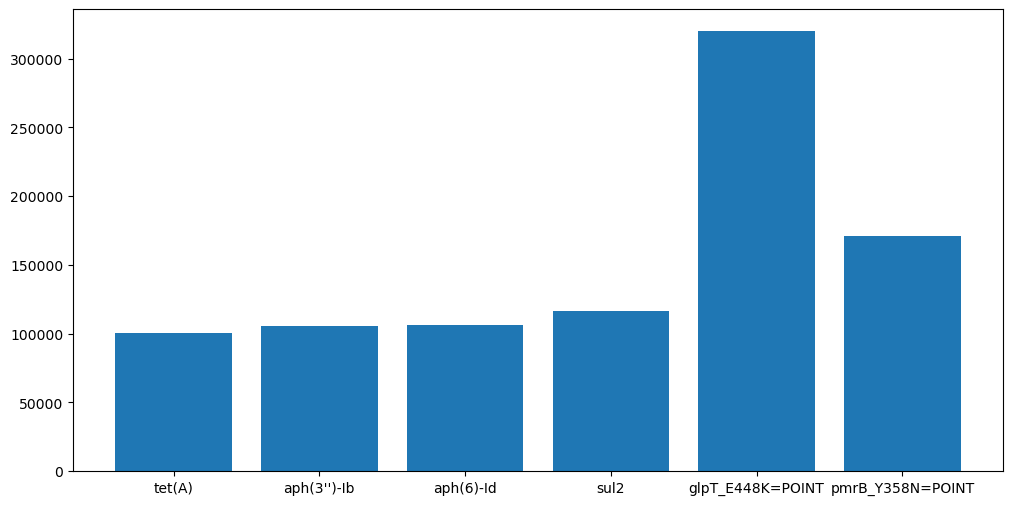

In [334]:
from collections import Counter

threshold = 100000

genes_count = Counter(list_genes_total)
genes_count = pd.DataFrame.from_dict(genes_count, orient='index').reset_index()
genes_count.rename(columns={0: 'count'}, inplace=True)
genes_count_filtered = genes_count[genes_count['count'] > threshold]
plt.figure(figsize=(12,6))
plt.bar(genes_count_filtered['index'], genes_count_filtered['count'])



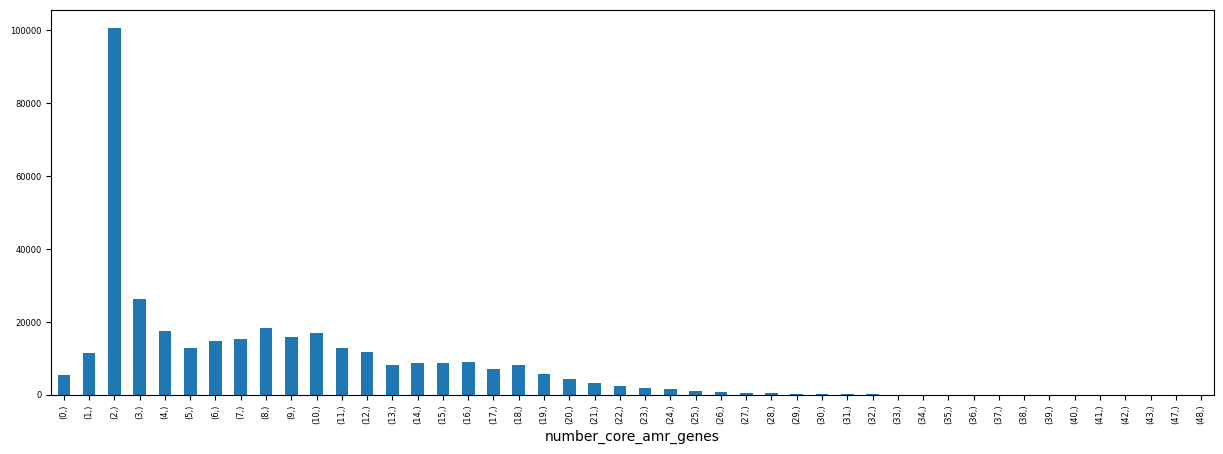

In [299]:
num_genes = data_selected["number_core_amr_genes"].to_frame()
gene_count = num_genes.value_counts().sort_index()

gene_bar = gene_count.plot(
    kind='bar', figsize=(15, 5), fontsize=6)


Collection dates

All data accounted for


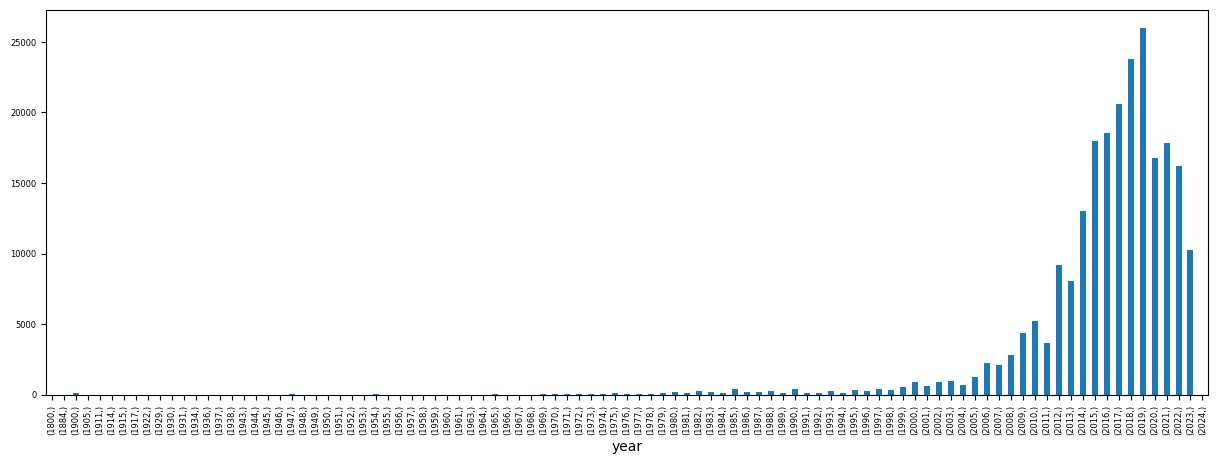

In [300]:
timestate = data_selected['collection_date'].to_frame()
unknown = ['missing']
timestate.loc[:,'collection_date'] = timestate['collection_date'].replace(unknown, np.nan)
timestate.loc[:,'collection_date'] = timestate['collection_date'].str.split('-').str[0]
timestate.loc[:,'collection_date'] = timestate['collection_date'].str.split('/').str[0]
timestate.rename(columns={'collection_date': 'year'}, inplace=True)
timestate_count = timestate.value_counts(dropna=False).sort_index()
timestate_count_nonan = timestate.value_counts(dropna=True).sort_index()

if sum(timestate_count) == num_genotypes:
    print("All data accounted for")
else:
    print("Some data missing")

show_nan = False
if show_nan == True:
    timestate_bar = timestate_count.plot(
        kind='bar', figsize=(15, 5), fontsize=6)
else:
    timestate_nonan_bar = timestate_count_nonan.plot(
    kind='bar', figsize=(15, 5), fontsize=6)



Geographic location

Number of unique countries: 159


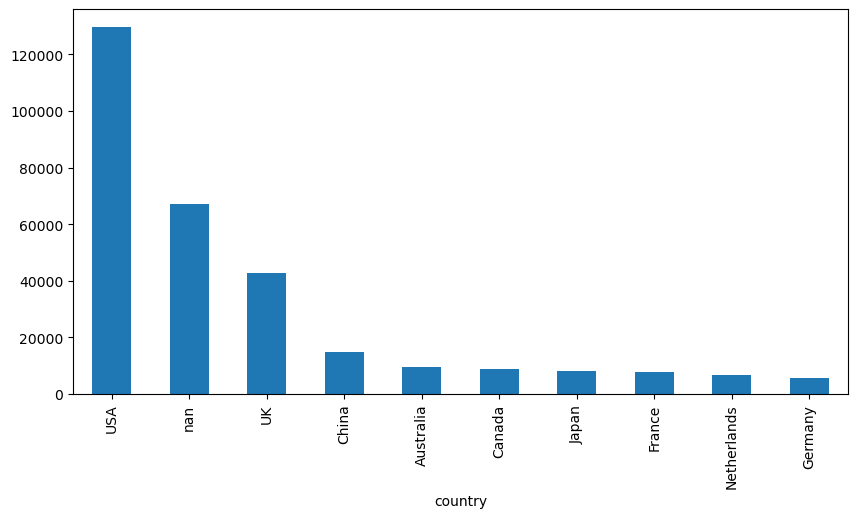

In [301]:
geo = data_selected['geo_loc_name'].to_frame()

alternative_nan = ['not determined', 'not collected', 'not provided', 'Not Provided', 'OUTPATIENT',
                       'missing: control sample', 'Not collected', 'Not Collected', 'not available', '-']
geo.loc[:,'geo_loc_name'] = geo['geo_loc_name'].replace(alternative_nan, np.nan)
geo.loc[:,'geo_loc_name'] = geo['geo_loc_name'].str.split(',').str[0]
geo.loc[:,'geo_loc_name'] = geo['geo_loc_name'].str.split(':').str[0] 
geo.rename(columns={'geo_loc_name': 'country'}, inplace=True)
geo.replace('United Kingdom', 'UK', inplace=True)

print(f"Number of unique countries: {geo['country'].nunique()}")
ax = geo['country'].value_counts(dropna=False).iloc[:10].plot(
    kind='bar', figsize=(10, 5), fontsize=10,
)



Host

Number of recorded sources: 4540


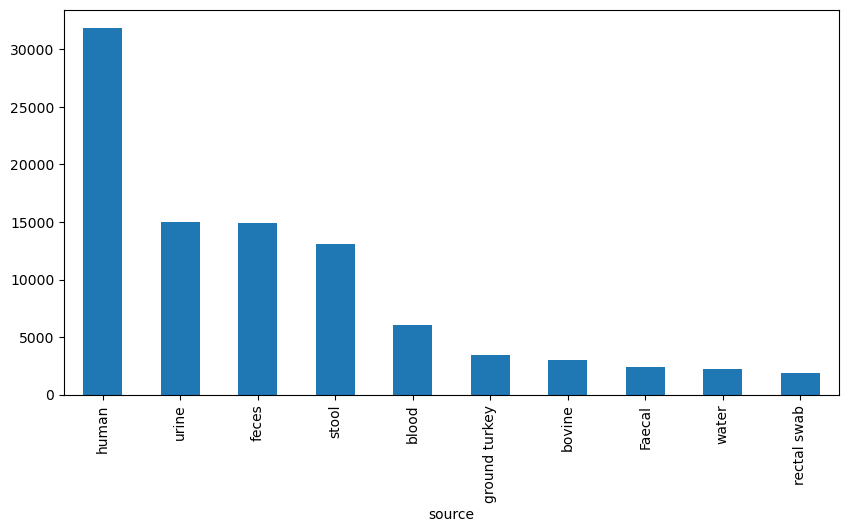

In [302]:
source = data_selected['isolation_source'].to_frame()

source.loc[:,'isolation_source'] = source['isolation_source'].str.split(',').str[0]
source.loc[:,'isolation_source'] = source['isolation_source'].str.split(':').str[0] 
source.rename(columns={'isolation_source': 'source'}, inplace=True)

print(f"Number of recorded sources: {source['source'].nunique()}")
ax = source['source'].value_counts(dropna=True).iloc[:10].plot(
    kind='bar', figsize=(10, 5), fontsize=10,
)


Phenotype

In [303]:
pheno = data_selected['AST_phenotypes'].to_frame()
pheno_filtered = pheno.dropna()

list_pheno_total = []
for idx, row in pheno_filtered.iterrows():
    item = row['AST_phenotypes']
    item=str(item)
    item = item.split(',')
    phenotype = 0
    while phenotype < len(item):
        list_pheno_total.append(item[phenotype])
        phenotype +=1

list_pheno = list(set(list_pheno_total))
list_pheno_df = pd.DataFrame(list_pheno)
list_pheno_df.rename(columns={0: 'antibiotics'}, inplace=True)
list_pheno_df.loc[:,'antibiotics'] = list_pheno_df['antibiotics'].str.split('=').str[0]
list_pheno_df_filtered = pd.DataFrame(sorted(set(list_pheno_df['antibiotics'])))
print("List antibiotics not filtered")
print(list_pheno_df_filtered)

#print(f"Number of antibiotics found: {list_pheno_df['antibiotics'].nunique()}")
#ax = list_pheno_df['antibiotics'].value_counts(dropna=False).iloc[:].plot(
#    kind='bar', figsize=(10, 5), fontsize=5,
#)


List antibiotics not filtered
                                0
0                Imipenem-EDTA-PA
1                        amikacin
2                     amoxicillin
3     amoxicillin-clavulanic acid
4                      ampicillin
5            ampicillin-sulbactam
6                    azithromycin
7                       aztreonam
8                      bacitracin
9                benzylpenicillin
10                  carbenicillin
11                      cefalexin
12                      cefalotin
13                      cefazolin
14                       cefepime
15                     cefotaxime
16     cefotaxime-clavulanic acid
17                      cefotetan
18                      cefovecin
19                      cefoxitin
20                    cefpodoxime
21                    ceftaroline
22                    ceftazidime
23          ceftazidime-avibactam
24    ceftazidime-clavulanic acid
25                      ceftiofur
26                    ceftizoxime
27         ceftolo

Filtering phenotypes

In [304]:
SIR_df = data_selected['AST_phenotypes'].to_frame()
SIR_df = pd.DataFrame(SIR_df.dropna())

list_SIR_total = []
for idx, row in SIR_df.iterrows():
    item = row['AST_phenotypes']
    item=str(item)
    item = item.split(',')
    phenotype = 0
    while phenotype < len(item):
        list_SIR_total.append(item[phenotype])
        phenotype +=1

list_SIR = list(set(list_SIR_total))
SIR_df = pd.DataFrame(list_SIR)
SIR_df.rename(columns={0: 'antibiotics'}, inplace=True)
SIR_df.loc[:,'antibiotics'] = SIR_df['antibiotics'].str.split('=')
SIR_df["S"] = SIR_df['antibiotics'].apply(lambda x: 'S' in x)
SIR_df["I"] = SIR_df['antibiotics'].apply(lambda x: 'I' in x)
SIR_df["R"] = SIR_df['antibiotics'].apply(lambda x: 'R' in x)
SIR_df.loc[:,'antibiotics'] = SIR_df['antibiotics'].str[0]


SIR_df.head()


,antibiotics,S,I,R
0,polymyxin,True,False,False
1,nitrofurantoin,False,True,False
2,clindamycin,True,False,False
3,colistin,True,False,False
4,nalidixic acid,True,False,False


Number of antibiotics used

In [331]:
phenoNMR = data_selected['AST_phenotypes'].to_frame()
phenoNMR = pd.DataFrame(phenoNMR.dropna())

phenoNMR.loc[:,'AST_phenotypes'] = phenoNMR['AST_phenotypes'].str.split(',')
phenoNMR["num"] = phenoNMR['AST_phenotypes'].apply(lambda x: len(x) if isinstance(x, list) else 0)

print(phenoNMR.head())

print("Most antibiotics tested:",int(phenoNMR['num'].max()))

                                         AST_phenotypes  num
1614  [ampicillin=ND, cefazolin=ND, cefepime=ND, cef...    9
1624  [ampicillin=ND, cefazolin=ND, cefepime=ND, cef...    9
1625  [ampicillin=ND, cefazolin=ND, cefepime=ND, cef...    9
1735                                      [cefepime=ND]    1
1736                                 [ciprofloxacin=ND]    1
Most antibiotics tested: 40


In [327]:
test = phenoNMR.loc[1742,'AST_phenotypes']
print(test)

['ampicillin=ND', 'cefazolin=ND', 'cefepime=ND', 'ceftriaxone=ND', 'ciprofloxacin=ND', 'gentamicin=ND', 'meropenem=ND', 'piperacillin-tazobactam=ND', 'tobramycin=ND', 'trimethoprim-sulfamethoxazole=ND']


Number of antibiotics tested


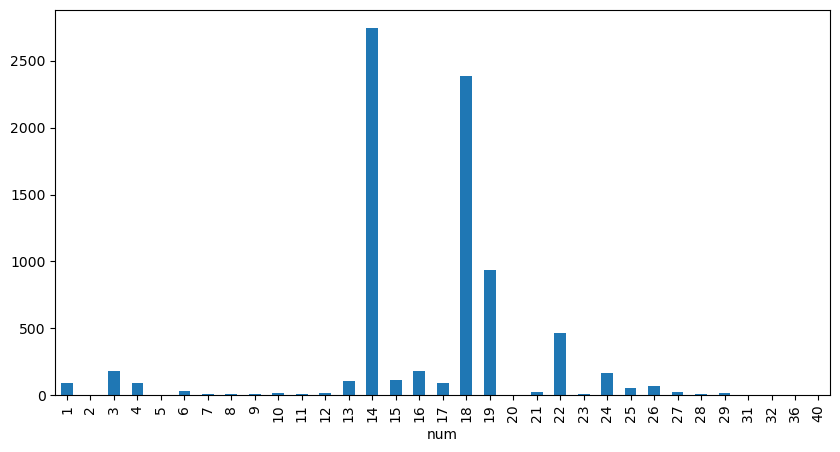

In [330]:
print("Number of antibiotics tested")
ax = phenoNMR['num'].value_counts(dropna=True).sort_index().iloc[:40].plot(
    kind='bar', figsize=(10, 5), fontsize=10,
)

kladd

till pheno 
#print("Number of unique genes in the set:",len(list_genes))
#num_genes = data_selected["number_core_amr_genes"].to_frame()
#print("The largest resistome contains:",int(num_genes.max()),"genes")